In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('Genre Classification Dataset/train_data.txt',sep=':::',names=["ID","Titles","Geners","Description"],engine='python')
test=pd.read_csv('Genre Classification Dataset/test_data.txt',sep=':::',names=["ID","Titles","Geners","Description"],engine='python')


In [4]:
train.head()

,ID,Titles,Geners,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Titles       54214 non-null  object
 2   Geners       54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
test.head()

,ID,Titles,Geners,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [7]:
train.describe

<bound method NDFrame.describe of           ID                                        Titles         Geners  \
0          1                 Oscar et la dame rose (2009)          drama    
1          2                                 Cupid (1997)       thriller    
2          3             Young, Wild and Wonderful (1980)          adult    
3          4                        The Secret Sin (1915)          drama    
4          5                       The Unrecovered (2007)          drama    
...      ...                                           ...            ...   
54209  54210                              "Bonino" (1953)         comedy    
54210  54211                  Dead Girls Don't Cry (????)         horror    
54211  54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54212  54213                     Make Your Own Bed (1944)         comedy    
54213  54214   Nature's Fury: Storm of the Century (2006)        history    

                                         

In [8]:
test_data_sol=pd.read_csv('Genre Classification Dataset/test_data_solution.txt',sep=':::',names=["ID","Titles","Geners","Description"],engine='python')


In [9]:
test_data_sol.head()

,ID,Titles,Geners,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [10]:
test.shape

(54200, 4)

In [11]:
test_data_sol.shape

(54200, 4)

In [12]:
train.isnull()

,ID,Titles,Geners,Description
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
54209,False,False,False,False
54210,False,False,False,False
54211,False,False,False,False
54212,False,False,False,False


In [13]:
train.isnull().sum()

ID             0
Titles         0
Geners         0
Description    0
dtype: int64

In [14]:
test.isnull()

,ID,Titles,Geners,Description
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
54195,False,False,False,True
54196,False,False,False,True
54197,False,False,False,True
54198,False,False,False,True


In [15]:
test.isnull().sum()

ID                 0
Titles             0
Geners             0
Description    54200
dtype: int64

In [16]:
test_data_sol.isnull().sum()

ID             0
Titles         0
Geners         0
Description    0
dtype: int64

In [17]:
import re

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Nisarg
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

In [22]:
import string

In [23]:
from nltk.stem import LancasterStemmer
stremmer=LancasterStemmer()
stop_words = set(stopwords.words('english'))
def remove_unnecessary_punctuation(text):
    text = text.lower()  
    text = re.sub(r'@\S+', '', text)  
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  
    return text

train["Clean_Description"]=train["Description"].apply(remove_unnecessary_punctuation)

In [24]:
from plotly import __version__
from plotly.offline import iplot


In [25]:
pip install cufflinks

In [26]:
import cufflinks as cf

C:\Users\Nisarg Shah\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [27]:
init_notebook_mode(connected=True)

NameError: name 'init_notebook_mode' is not defined

In [28]:
cf.go_offline()

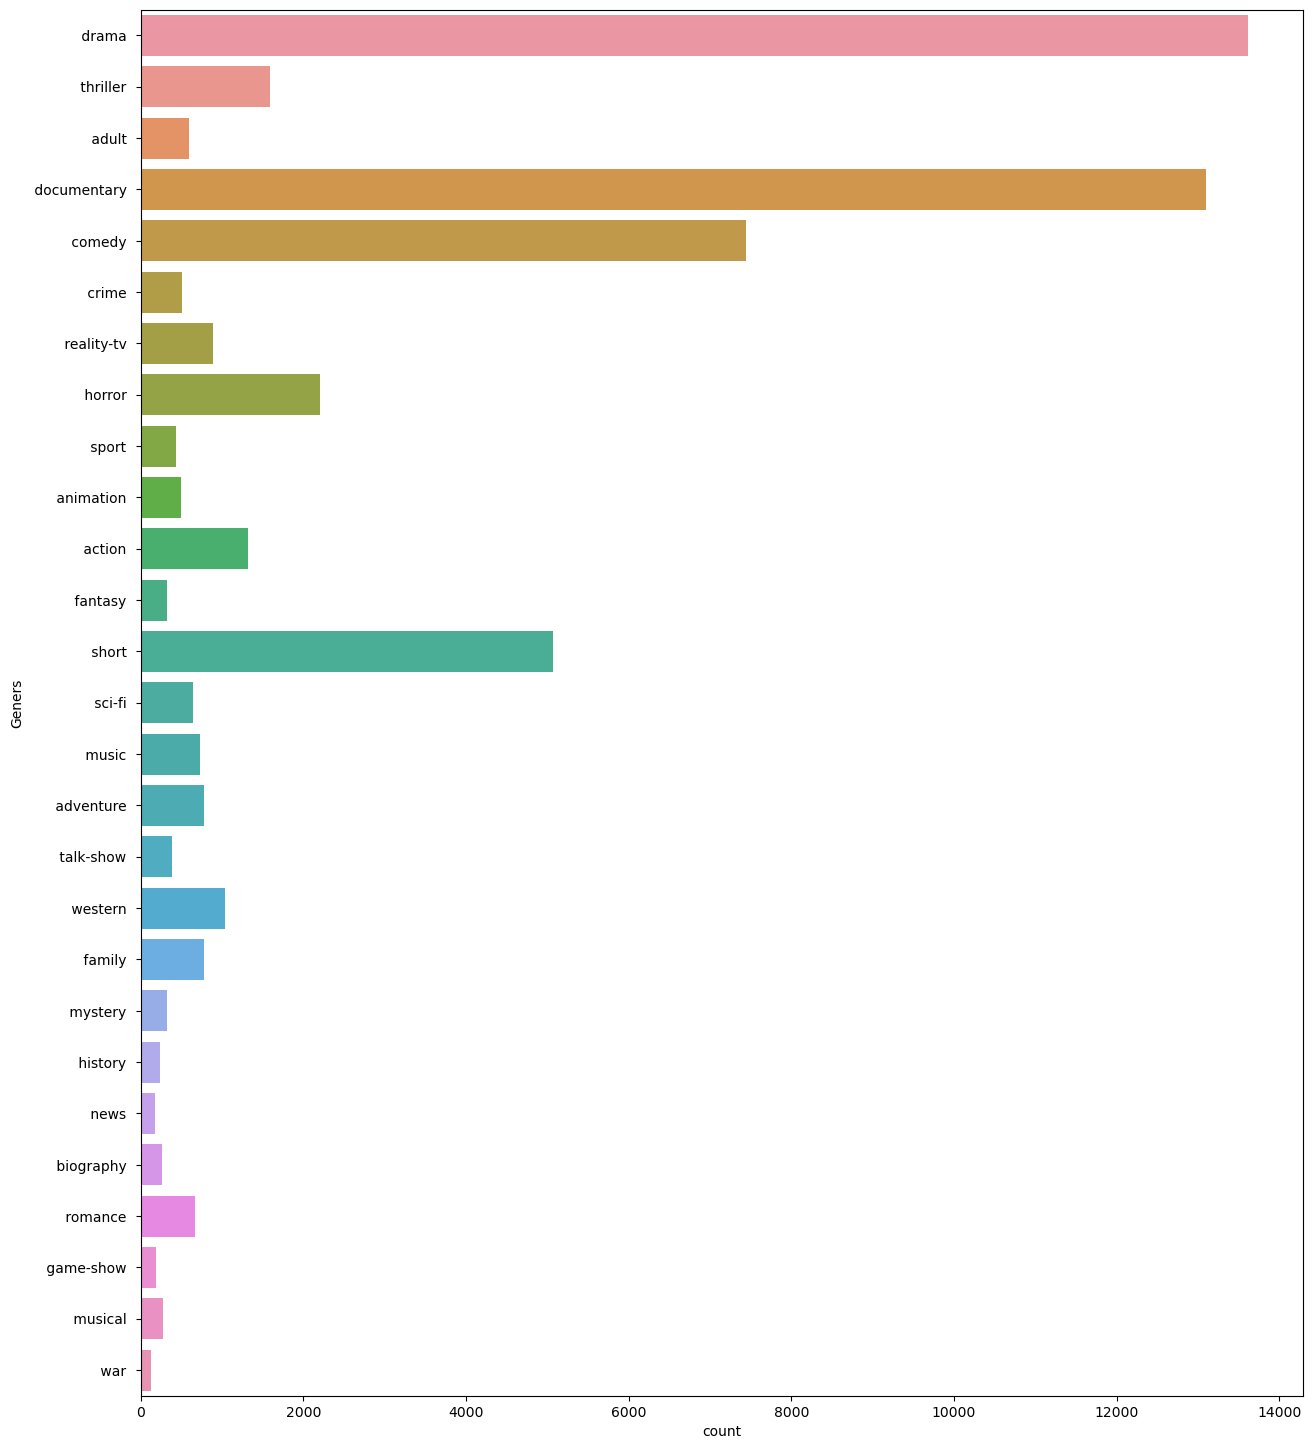

In [30]:
plt.figure(figsize=(15,18))
sns.countplot(data=train,y='Geners')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X=train['Clean_Description'].iloc[:60000]
y=train['Geners'].iloc[:60000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.6, random_state=101)

In [33]:
from sklearn.svm import SVC

In [34]:
svc=SVC()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorize = TfidfVectorizer()
X_train_tfidf  = vectorize.fit_transform(X_train)
X_test_tfidf  = vectorize.transform(X_test)

In [37]:
svc.fit(X_train_tfidf,y_train)

SVC()

In [38]:
predictions = svc.predict(X_test_tfidf)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,predictions))

[[  20    0    0    0    0   65    0  158  520    0    0    0    0   13
     0    0    0    0    0    0    2    9    0    0    1    0    4]
 [   0   30   10    0    0  109    0   32  144    0    0    0    0    1
     0    0    0    0    0    0    0   11    0    0    0    0    0]
 [   0   11   26    0    0   55    0  122  247    0    0    0    0   13
     0    0    0    0    0    0    0    9    0    0    2    0    0]
 [   0    0    0    0    0   96    0   65  121    0    0    0    0    7
     0    0    0    0    0    0    0   10    0    0    0    0    0]
 [   0    0    0    0    0    9    0  118   35    0    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    1    0    0]
 [   1    0    0    0    0 2076    0  382 1933    0    0    0    0   21
     1    0    0    0    0    0    0   32    0    0    1    0    0]
 [   2    0    0    0    0   29    0   41  238    0    0    0    0    3
     0    0    0    0    0    0    0    1    0    0    1    0    0]
 [   1    0    0    

In [41]:
print(classification_report(y_test,predictions))

C:\Users\Nisarg Shah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



               precision    recall  f1-score   support

      action        0.71      0.03      0.05       792
       adult        0.73      0.09      0.16       337
   adventure        0.70      0.05      0.10       485
   animation        0.00      0.00      0.00       299
   biography        0.00      0.00      0.00       164
      comedy        0.53      0.47      0.50      4447
       crime        0.00      0.00      0.00       315
 documentary        0.60      0.89      0.72      7887
       drama        0.46      0.84      0.59      8167
      family        0.67      0.01      0.02       475
     fantasy        0.00      0.00      0.00       179
   game-show        0.97      0.32      0.49       111
     history        0.00      0.00      0.00       150
      horror        0.73      0.39      0.51      1308
       music        0.87      0.14      0.24       433
     musical        0.00      0.00      0.00       168
     mystery        0.00      0.00      0.00       202
        n

C:\Users\Nisarg Shah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Nisarg Shah\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [42]:
from sklearn.metrics import accuracy_score

In [43]:
y_pred_val = svc.predict(X_test_tfidf)
valAccuracy = accuracy_score(y_test, y_pred_val)
print("Validation Accuracy:", valAccuracy)

Validation Accuracy: 0.5361677272587537
